# 7. Numpy - Matrices de datos multidimensionales
---------------------

Numpy es la biblioteca central para la computación científica en Python. Proporciona un objeto de matriz multidimensional de alto rendimiento y herramientas para trabajar con estas matrices. 
Además de sus usos científicos obvios, NumPy también puede ser utilizado como un eficiente contenedor multidimensional de datos genéricos. Se pueden definir tipos de datos arbitrarios. Esto permite a NumPy integrarse de forma transparente y rápida con una amplia variedad de bases de datos.

## Arrays

Una matriz numpy es una cuadrícula de valores, todos del mismo tipo, y es indexada por una tupla de enteros no negativos. El número de dimensiones es el rango de la matriz; La forma de una matriz es una tupla de enteros que da el tamaño de la matriz a lo largo de cada dimensión.

Podemos inicializar matrices numpy de listas anidadas de Python y acceder a elementos usando corchetes:

In [1]:
import numpy as np # importamos numpy como np*

a = np.array([23, 12, 94])  # Crea un array de rango 1
print(type(a))          

<class 'numpy.ndarray'>


In [2]:
print(a.shape) # Imprime la forma del array

(3,)


In [3]:
print(a[0], a[1], a[2])   # Los indices son iguales de las listas
a[0] = 2                # Podemos modificar los elementos de un array (son mutables)
print(a)                 

23 12 94
[ 2 12 94]


In [4]:
b = np.array([[10,12,13],[24,25,26]])   # Crea un array de rango 2
print(b)
print()

print(b.shape)
print()

print(b[0, 0], b[0, 1], b[1, 0])   

[[10 12 13]
 [24 25 26]]

(2, 3)

10 12 24


In [5]:
# Una mejor manera de definir un array seria asi:
M = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
    ]) 

print(M)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Numpy también viene con numerosas funciones para crear arrays:

In [6]:
a = np.zeros((3,3)) # Crea una matriz de ceros
print(a)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [7]:
b = np.ones((3,3)) # Crea una matriz de unos
print(b)

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [8]:
c = np.full((2, 2), 10, dtype=np.int) # Crea una matriz constante
print(c)

[[10 10]
 [10 10]]


In [9]:
d = np.eye(3)        # Crea una matriz identidad de 3x3
print(d)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [10]:
e = np.random.randint(10, size=(3, 4))          #Crea una matriz aleatoria de 3x4
print(e)

[[9 8 1 2]
 [0 3 5 6]
 [4 5 0 2]]


Para crear secuencias de números, NumPy proporciona una función análoga a rango que devuelve arrays en lugar de listas:

In [11]:
import numpy as np
a = np.arange( 15, 50, 5 )
b = np.arange( 0, 4, 0.4 )
print(a)
print(type(a))
print(b)

[15 20 25 30 35 40 45]
<class 'numpy.ndarray'>
[ 0.   0.4  0.8  1.2  1.6  2.   2.4  2.8  3.2  3.6]


Cuando arange se utiliza con argumentos de punto flotante, generalmente no es posible predecir el número de elementos obtenidos, debido a la precisión de punto flotante finito. Por esta razón, normalmente es mejor usar la función **linspace** que recibe como argumento el número de elementos que queremos, en lugar del paso:

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.  ]


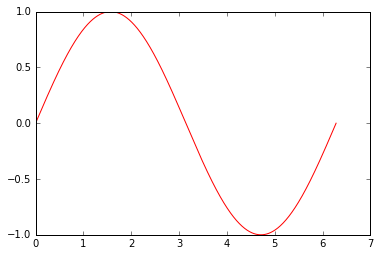

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

test = np.linspace( 0, 2, 9 )                 # 9 numeros del 0 2 (incluye al 0 y al 2)
print(test)
x = np.linspace( 0, 2*np.pi, 1000 )
f = np.sin(x)

plt.plot(x,f, 'r')
plt.show()


Ahora porque debemos usar estas funciones arrange en vez de range??? 

In [13]:
# Creamos una lista con range
lista = list(range(0,100000))
type(lista)

list

In [14]:
%%timeit
sum(lista)

1000 loops, best of 3: 1.17 ms per loop


In [15]:
# Ahora lo creamos con arange
array = np.arange(0, 100000)

In [16]:
%%timeit
np.sum(array)

10000 loops, best of 3: 60.6 µs per loop


Como ves, las mejoras en este caso son de 2 órdenes de magnitud. NumPy nos ofrece funciones que se ejecutan prácticamente en tiempos de lenguaje compilado (Fortran, C, C++) y optimizado, pero escribiendo mucho menos código y con un nivel de abstracción mayor.

## Indexación de matrices
Numpy ofrece varias formas de indexar en arreglos.

**Slicing:** Similar a las listas de Python, matrices numpy se pueden cortar. Dado que los arrays pueden ser multidimensionales, debe especificar una división para cada dimensión de la matriz:

In [17]:
import numpy as np

# Crea una array con forma (3,4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Usaremos slicing para obtener el subarray de 2 filas
# y las columnas 1 y 2; b sera un array de (2,2):
# [[2 3]
#  [6 7]]

b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


In [18]:
# Una porción de una matriz es una vista de los mismos datos
# por lo que la modificación modificará la matriz original.
print(a[0, 1])   # Imprimirá "2"
b[0, 0] = 77    # b[0, 0] es la misma data de a[0, 1]
print(a[0, 1])   # Imprimirá "77"

2
77


También puede mezclar índices enteros con indexación de sectores. Sin embargo, al hacerlo, se obtendrá una matriz de rango inferior a la matriz original.

![Alt text](images/matrizslice.png "Optional title")

In [19]:
import numpy as np

# Crea una array con forma (3,4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Dos maneras de acceder a la data en el medio de las filas del array
# La mezcla de índices de indexación con slicing produce una matriz de menor rango,
# Mientras que el uso de sólo slicing produce una matriz del mismo rango que el array original

fila_f1 = a[1, :]    # Vista de la segunda fila de A de Rango 1
fila_f2 = a[1:2, :]  # Vista de la segunda fila de A de Rango 2
print(fila_f1, fila_f1.shape)  # Imprimirá "[5 6 7 8] (4,)"
print(fila_f2, fila_f2.shape)  # Imprimirá "[[5 6 7 8]] (1, 4)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


In [20]:
# Podemos hacer la misma distincion cuando accedemos a las columnas de un array
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                            #          [ 6]
                            #          [10]] (3, 1)"

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**Indexación de matrices de números enteros**: Cuando indexa matrices numpy utilizando slicing, la vista de array resultante siempre será un subarray de la matriz original. Por el contrario, la indexación de matriz de números enteros le permite construir arrays arbitrarios utilizando los datos de otra matriz. Aquí hay un ejemplo:

In [21]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

# Un ejemplo de indexacion de matrices de enteros
# El array retornado tendrá forma (3,) y
print(a[[0, 1, 2], [0, 1, 0]])  # Impimirá "[1 4 5]"

[1 4 5]


In [22]:
# El ejemplo anterior de indexacion de matriz de números enteros es equivalente a esto:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Impimirá "[1 4 5]"

[1 4 5]


In [23]:
# Cuando utilice la indexacion de matriz de números enteros, puede reutilizar el mismo elemento de la matriz de origen:
print(a[[0, 0], [1, 1]])  # Impimirá "[2 2]"

[2 2]


In [24]:
# Equivalente al ejemplo anterior de indexacion de matriz de números enteros
print(np.array([a[0, 1], a[0, 1]]))  # Impimirá "[2 2]"

[2 2]


Un truco útil con la indexacion de matriz de números enteros es la selección o mutación de un elemento de cada fila de una matriz:

In [25]:
import numpy as np

# Crear una nueva matriz a partir de la cual seleccionaremos elementos
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print (a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [26]:
# Crear una matriz de índices
b = np.array([0, 2, 0, 1])

# Selecciona un elemento de cada fila de a usando los índices en b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [27]:
# Muta un elemento de cada fila de a usando los índices en b
a[np.arange(4), b] += 10

print (a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


## Datatypes

Cada matriz numpy es una cuadrícula de elementos del mismo tipo. Numpy proporciona un gran conjunto de tipos de datos numéricos que puede utilizar para construir matrices. Numpy intenta adivinar un tipo de datos cuando se crea una matriz, pero las funciones que construyen arrays generalmente también incluyen un argumento opcional para especificar explícitamente el tipo de datos. Aquí hay un ejemplo:

In [28]:
x = np.array([1, 2])  
print(x.dtype)        

int64


In [29]:
x = np.array([1.0, 2.0])  
print(x.dtype)             

float64


In [30]:
x = np.array([1, 2], dtype=np.int64)  
print (x.dtype)                     

int64


## Operaciones Matemáticas en arrays

Las funciones matemáticas básicas funcionan de manera **elementwise** en arrays, y están disponibles como sobrecargas del operador y como funciones en el módulo numpy:

In [31]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

print("El array X es:")
print(x)
print()

print("El array Y es:")
print(y)
print()

print(x + y)
print()
print(np.add(x, y))

El array X es:
[[ 1.  2.]
 [ 3.  4.]]

El array Y es:
[[ 5.  6.]
 [ 7.  8.]]

[[  6.   8.]
 [ 10.  12.]]

[[  6.   8.]
 [ 10.  12.]]


In [32]:
print(x - y)
print()
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]

[[-4. -4.]
 [-4. -4.]]


In [33]:
print(x * y)
print()
print(np.multiply(x, y))

[[  5.  12.]
 [ 21.  32.]]

[[  5.  12.]
 [ 21.  32.]]


In [34]:
print(x / y)
print()
print(np.divide(x, y))

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]


In [35]:
print(np.sqrt(x))

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


Tenga en cuenta que a diferencia de MATLAB, ** * ** es multiplicación elemental, no multiplicación matricial. Utilizamos la función de punto para calcular productos internos de vectores, multiplicar un vector por una matriz y multiplicar matrices. **Dot** está disponible tanto como una función en el módulo numpy como un método de instancia de objetos de matriz:

In [36]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Producto interno de vectores
print(v.dot(w))
print(np.dot(v, w))

219
219


In [37]:
# Producto de matrices por vectores 
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [38]:
# Multiplicacion de matrices 
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy proporciona muchas funciones útiles para realizar cálculos en matrices; Uno de los más útiles es **sum**:

In [39]:
import numpy as np

x = np.array([[1,2],[3,4]])
print(x)
print()
print (np.sum(x))  # Halla la suma de todos los elementos
print()
print (np.sum(x, axis=0))  # Halla la suma de cada columna
print()
print (np.sum(x, axis=1))  # Halla la suma de cada fila

[[1 2]
 [3 4]]

10

[4 6]

[3 7]


Si desea más información acerca de las funciones matemáticas que provee numpy visite:

https://docs.scipy.org/doc/numpy/reference/routines.math.html

Aparte de calcular funciones matemáticas usando matrices, con frecuencia necesitamos cambiar la forma o de otra manera manipular datos en matrices. El ejemplo más simple de este tipo de operación es la transpuesta de una matriz; Para transponer una matriz, simplemente use el atributo **T** de un objeto de matriz:

In [40]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    
print()
print(x.T)

[[1 2]
 [3 4]]

[[1 3]
 [2 4]]


In [41]:
# Que pasará si hacemos la transpuesta de una matriz de rango 1
v = np.array([1,2,3])
print(v)
print(v.T) 

[1 2 3]
[1 2 3]


### Reshape

Con np.arange() es posible crear "vectores" cuyos elementos tomen valores consecutivos o equiespaciados, como hemos visto anteriormente. ¿Podemos hacer lo mismo con "matrices"? Pues sí, pero no usando una sola función. Imagina que quieres crear algo como esto:

$$
\left(\begin{array}{ccc} 
10 & 20 & 30\\
40 & 50 & 60\\
70 & 80 & 90\\
\end{array}\right)
$$ 

* Comenzaremos por crear un array 1d con los valores (10,20,30,40...) usando np.arange().
* Luego le daremos forma de array 2d. con np.reshape(array, (dim0, dim1)).

In [42]:
a = np.arange(10,100,10)
print(a)
print()

M = np.reshape(a, [3, 3])
print(M)

[10 20 30 40 50 60 70 80 90]

[[10 20 30]
 [40 50 60]
 [70 80 90]]


## Broadcasting

**Broadcasting** es un potente mecanismo que permite a numpy trabajar con matrices de diferentes formas al realizar operaciones aritméticas. Con frecuencia tenemos una matriz más pequeña y una matriz más grande, y queremos usar la matriz más pequeña varias veces para realizar alguna operación en la matriz más grande. 

![Alt text](images/numpy_broadcasting.png "Optional title")

Por ejemplo, supongamos que queremos añadir un vector constante a cada fila de una matriz. Podríamos hacerlo así:

In [43]:
import numpy as np

# Vamos a añadir el vector V a cada fila de la matriz x
# guardando el resultado en la matriz y

x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Creamos una matriz vacia de la misma forma de X

# Añadimos el vector v a cada fila de la matriz X con un loop

for i in range(4):
    y[i, :] = x[i, :] + v

print(y)


[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Esto funciona; Sin embargo, cuando la matriz x es muy grande, el cálculo de un bucle explícito en Python podría ser lento. Obsérvese que la adición del vector v a cada fila de la matriz x es equivalente a formar una matriz vv apilando múltiples copias de v verticalmente, realizando entonces la suma elemental de x y vv. Podríamos implementar este enfoque como este:


In [44]:
import numpy as np

# Vamos a añadir el vector V a cada fila de la matriz x
# guardando el resultado en la matriz y

x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))  # Apila 4 copias de v una encima de la otra
print (vv)                 

y = x + vv  
print(y)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy Broadcasting nos permite realizar este cálculo sin realmente crear múltiples copias de v. Considere esta versión, utilizando la Broadcasting:

In [45]:
import numpy as np

# Vamos a añadir el vector V a cada fila de la matriz x
# guardando el resultado en la matriz y

x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Añada v a cada fila de x mediante broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


### Fancy indexing

**Fancy indexing** es cuando se utiliza una matriz o lista en lugar de un índice:

In [46]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [47]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 22, 34])

## Transformaciones Array/Matrix 

Arriba hemos utilizado el .T para transponer la matriz v. También podríamos haber utilizado la función de transposición para lograr la misma cosa. 

Otras funciones matemáticas que transforman objetos matriciales son:

In [48]:
C = np.matrix([[1j, 2j], [3j, 4j]])
C

matrix([[ 0.+1.j,  0.+2.j],
        [ 0.+3.j,  0.+4.j]])

In [49]:
np.conjugate(C)

matrix([[ 0.-1.j,  0.-2.j],
        [ 0.-3.j,  0.-4.j]])

Conjugado hermitiano: transpuesta + conjugada

In [50]:
C.H

matrix([[ 0.-1.j,  0.-3.j],
        [ 0.-2.j,  0.-4.j]])

In [51]:
np.real(C)

matrix([[ 0.,  0.],
        [ 0.,  0.]])

In [52]:
np.imag(C)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

Para obtener el angulo o argumento

In [53]:
np.angle(C)

array([[ 1.57079633,  1.57079633],
       [ 1.57079633,  1.57079633]])

In [54]:
np.abs(C)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

## Ahora veamos algo de Algebra lineal

El paquete de álgebra lineal en NumPy se llama linalg, así que importando NumPy con la convención habitual podemos acceder a él escribiendo np.linalg. Si imprimimos la ayuda del paquete vemos que tenemos funciones para:

- Funciones básicas (norma de un vector, inversa de una matriz, determinante, traza)
- Resolución de sistemas
- Autovalores y autovectores
- Descomposiciones matriciales (QR, SVD)
- Pseudoinversas

In [55]:
help(np.linalg)

Help on package numpy.linalg in numpy:

NAME
    numpy.linalg

DESCRIPTION
    Core Linear Algebra Tools
    -------------------------
    Linear algebra basics:
    
    - norm            Vector or matrix norm
    - inv             Inverse of a square matrix
    - solve           Solve a linear system of equations
    - det             Determinant of a square matrix
    - lstsq           Solve linear least-squares problem
    - pinv            Pseudo-inverse (Moore-Penrose) calculated using a singular
                      value decomposition
    - matrix_power    Integer power of a square matrix
    
    Eigenvalues and decompositions:
    
    - eig             Eigenvalues and vectors of a square matrix
    - eigh            Eigenvalues and eigenvectors of a Hermitian matrix
    - eigvals         Eigenvalues of a square matrix
    - eigvalsh        Eigenvalues of a Hermitian matrix
    - qr              QR decomposition of a matrix
    - svd             Singular value decomposition 

### Determinante de una matriz

In [56]:
A = np.array([[2,0,1],[3,0,0],[5,1,1]])
np.linalg.det(A)

3.0000000000000004

### Inversa de una matriz

In [57]:
A = np.array([[2,0,1],[3,0,0],[5,1,1]])
np.linalg.inv(A)

array([[ 0.        ,  0.33333333,  0.        ],
       [-1.        , -1.        ,  1.        ],
       [ 1.        , -0.66666667,  0.        ]])

En la versión 3.5 de Python se incorporó un nuevo operador @ para poder calcular hacer multiplicaciones de matrices de una forma más legible

In [58]:
mat = np.array([[1, 5, 8, 5],
                [0, 6, 4, 2],
                [9, 3, 1, 6]])

vec1 = np.array([5, 6, 2])

vec1 @ mat

array([23, 67, 66, 49])

## Copy y "deep copy"


Para lograr un alto rendimiento, las asignaciones en Python usualmente no copian los objetos subyacentes. Esto es importante por ejemplo cuando se pasan objetos entre funciones, para evitar una cantidad excesiva de copias de memoria cuando no es necesario (término técnico: pasar por referencia).

In [59]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [60]:
# Ahora B esta referenciando al mismo array que A
B = A 

In [61]:
# Los cambios que apliquemos a B afectarán a A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [62]:
A

array([[10,  2],
       [ 3,  4]])

Si queremos evitar este comportamiento, para que cuando obtengamos un nuevo objeto completamente independiente B, copiado de A, entonces necesitamos hacer una llamada "copia profunda" usando la función copy al igual que hicimos con las listas:

In [63]:
B = np.copy(A)

In [64]:
B[0,0] = 5
B

array([[5, 2],
       [3, 4]])

In [65]:
A

array([[10,  2],
       [ 3,  4]])

## Iterando sobre los elementos del array

Generalmente, queremos evitar iterar sobre los elementos de arrays cada vez que podemos (a toda costa). La razón es que en un lenguaje interpretado como Python (o MATLAB), las iteraciones son realmente lentas en comparación con las operaciones vectorizadas.

Sin embargo, a veces las iteraciones son inevitables. Para estos casos, el Python for loop es la forma más conveniente de iterar sobre una matriz:

In [66]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [67]:
M = np.array([[1,2], [3,4]])

for row in M:
    print("fila", row)
    
    for element in row:
        print(element)

fila [1 2]
1
2
fila [3 4]
3
4


Cuando necesitamos iterar sobre cada elemento de una matriz y modificar sus elementos, es conveniente utilizar la función enumerate para obtener tanto el elemento como su índice en el bucle for:

In [68]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [69]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Funciones Vectorizadas

Como se mencionó en varias ocasiones a estas alturas, para obtener un buen rendimiento deberíamos tratar de evitar el bucle de elementos en nuestros vectores y matrices, y en su lugar utilizar algoritmos vectorizados. El primer paso en la conversión de un algoritmo escalar a un algoritmo vectorizado es asegurarse de que las funciones que escribimos trabajan con entradas vectoriales.

In [70]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0
    
Theta(np.array([[1,-2,3,-4]]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Eso no funcionó porque no escribimos la función Theta para que pueda manejar una entrada vectorial ...

Para obtener una versión vectorizada de Theta podemos usar la función Numpy **vectorize**. En muchos casos puede vectorizar automáticamente una función:

In [71]:
Theta_vec = np.vectorize(Theta)

In [72]:
Theta_vec(np.array([[1,-2,3,-4]]))

array([[1, 0, 1, 0]])

### Veamos algunas aplicaciones

Resolver el siguiente sistema: 

$$
\left(\begin{array}{ccc} 
2 & 0 & 1\\
3 & 0 & 0\\
5 & 1 & 1\\
\end{array}\right)
\left(\begin{array}{ccc} 
1 & 0 & 1\\
1 & 2 & 1\\
1 & 1 & 0\\
\end{array}\right)
\left(\begin{array}{c} 
x \\
y \\
z \\
\end{array}\right)
=
\left(\begin{array}{ccc} 
21 \\
15 \\
30 \\
\end{array}\right)
$$ 

In [75]:
M = (np.array([[2, 0, 1],
               [3, 0, 0],
               [5, 1, 1]])
     @
     np.array([[1, 0, 1],
               [1, 1, 2],
               [1, 1, 0]]))
print(M)

[[3 1 2]
 [3 0 3]
 [7 2 7]]


In [76]:
x = np.linalg.solve(M, np.array([21, 15, 30]))
x

array([ 13.5,  -2.5,  -8.5])

## Ejercicios:

Sean las matrices:


$$ B = 
\left(\begin{array}{ccc} 
1 & 2 & -3\\
3 & 4 & -1\\
\end{array}\right)
, A= 
\left(\begin{array}{ccc} 
2 & -5 & 1\\
1 & 4 & 5\\
2 & -1 & 6\\
\end{array}\right)
,y =
\left(\begin{array}{c} 
2 \\
-4 \\
1 \\
\end{array}\right)
,z=
\left(\begin{array}{ccc} 
-15 \\
-8 \\
-22 \\
\end{array}\right)
$$

Calcule e imprima cada una de las siguientes operaciones:

* $BA$ 


* $AB^T$


* $Ay$


* $y^{T}z$ (Este es el producto interno, o producto de punto, de y & z.)


* $yz^T$ (Este es el producto tensorial de y & z.)
